> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday*, February 13, 2019, 23:59<br>
**Peergrading deadline**: *Sunday*, February 16, 2019, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, February 20, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex 1.1.10**: `dict`s and `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

1.1.10.1:
If you try to get an object that is not already in the dictionary, a normal dictionary will throw an error while a default dict will create that new object.

In [38]:
from collections import defaultdict

#create the dictionary
l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

#create an empty defaultdict
d = defaultdict(list)

#add dictionary l into defaultdict
for i,j in l:
    d[i].append(j)
print(d)

defaultdict(<class 'list'>, {'a': [1, None, None], 'b': [3, True], 'c': [False]})


>**Ex. 1.2.4**: The URL reveals that the data is from reddit/r/gameofthrones, but can you recover that information from the data? Give your answer by 'keying' into the JSON data using square brackets.

>*Hint: 'Keying' is a word i just made up. By it, I mean the following. Consider a JSON object such as:*
>
>        my_json_obj = {
>            'cats': {
>                'awesome': ['Missy'],
>                'useless': ['Kim', 'Frank', 'Sandy']
>            },
>            'dogs': {
>                'awesome': ['Finn', 'Dolores', 'Fido', 'Casper'],
>                'useless': []
>            }
>        }
>
>*I can get the list of useless cats by keying into `my_json_obj` like such:*
>
>        >>> my_json_obj['cats']['useless']
>        Out [ ]: ['Kim', 'Frank', 'Sandy']
>
>*`my_json_obj['cats']` returns the dictionary `{'awesome': ['Missy'], 'useless': ['Kim', 'Frank', 'Sandy']}` and getting '`useless`' from that eventually gives us `['Kim', 'Frank', 'Sandy']`. If any of those list items were a list of a dictionary themselves, we could have kept keying deeper into the structure.*

In [39]:
import requests as rq
import json

#get the data from the URL, turn into JSON object
data = rq.get('https://www.reddit.com/r/gameofthrones/.json').json()
data.keys()
#to check if the request is going through
print(data.keys())

#print the data from the URL
print(json.dumps(data['data']['children'], indent=4))

dict_keys(['kind', 'data'])
[
    {
        "kind": "t3",
        "data": {
            "approved_at_utc": null,
            "subreddit": "gameofthrones",
            "selftext": "",
            "author_fullname": "t2_gd2mp",
            "saved": false,
            "mod_reason_title": null,
            "gilded": 0,
            "clicked": false,
            "title": "[SPOILERS] Excited for the new season? Join the discussion on our Discord!",
            "link_flair_richtext": [
                {
                    "e": "text",
                    "t": "Spoilers"
                }
            ],
            "subreddit_name_prefixed": "r/gameofthrones",
            "hidden": false,
            "pwls": 6,
            "link_flair_css_class": "s-spoilers",
            "downs": 0,
            "thumbnail_height": 73,
            "hide_score": false,
            "name": "t3_agmnca",
            "quarantine": false,
            "link_flair_text_color": "dark",
            "author_flair_backgro

>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [41]:
#count the number of spoilers
spoilers = 0
for item in data['data']['children']:
    if item['data']['spoiler'] is True:
        spoilers = spoilers + 1
print("Number of Spoilers:", spoilers)

Number of Spoilers: 8


In [40]:
#print the headlines that aren't spoilers
for item in data['data']['children']:
    if item['data']['spoiler'] is False:
        print(item['data']['title'])

[SPOILERS] Excited for the new season? Join the discussion on our Discord!
[Mod Raven] Update: All sigils have been added – here's how to get your house flair!
[SPOILERS] GF started watching GoT 1 week ago. Nothing had been spoiled for her.
[SPOILERS] I got my husband custom Game of Thrones cookies for Valentine’s day
[NO SPOILERS] Game of Pizza
[NO SPOILERS] A Storm of Swords - Oil Painting by Donato Giancola
[NO SPOILERS] Official GRR Martin action figure
[SPOILERS] Daenerys Stormborn of the House Targaryen, First of Her Name, the Unburnt, Queen of the Andals and the First Men, Khaleesi of the Great Grass Sea, Breaker of Chains, and Mother of Dragons.
[Spoilers] That must be one of the best Tyrion/Cersei scenes in the entire show! Tyrion was like: "hug her, hug her not"
[No Spoilers] Emilia Clarke Gives the Game of Thrones Cast Superlatives
[SPOILERS] 7/67, You Win or You Die
[No Spoilers] Doing a Season 8 survivor pool with my friends, so I decided to learn some web design and hand-

### Week 2

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("news", 500, count=25)
a, b = get_x_y("blackmirror", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_apxyzd
Retrieved 25 posts from page t3_aq31dz
Retrieved 25 posts from page t3_apxg14
Retrieved 25 posts from page t3_apox5g
Retrieved 25 posts from page t3_apnw2m
Retrieved 25 posts from page t3_ap56fu
Retrieved 25 posts from page t3_ap6jp7
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apxyzd
Retrieved 25 posts from page t3_aq31dz
Retrieved 25 posts from page t3_apxg14
Retrieved 25 posts from page t3_apox5g
Retrieved 25 posts from page t3_apnw2m
Retrieved 25 posts from page t3_ap56fu
Retrieved 25 posts from page t3_ap6jp7
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apxyzd
Retrieved 25 posts from page t3_aq31dz
Retrieved 25 posts from page t3_apxg14
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_apxny7
Retrieved 25 posts from page t3_apdbql
Retrieved 25 posts from page t3_aorf4g
Retrieved 25 posts from page t3_ao83p6
Retrieved 25 posts from page t3_an8isc
Retrieved 25 p

In [4]:
import numpy as np
x = np.log2(x)
y = np.log2(y)
a = np.log(a)
b = np.log(b)

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


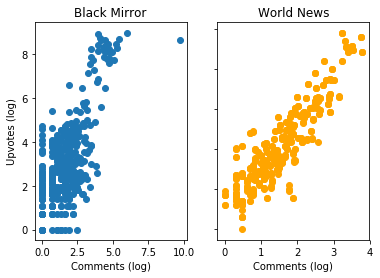

In [15]:
#3 invoking WILDCARD for 2.1.2.3 bc the scales are not formatted correctly
plt.subplot(1,2,1, ylabel="Upvotes (log)", xlabel="Comments")
plt.title("Black Mirror")
plt.xlabel("Comments (log)")
plt.scatter(a,b)
#yticklabels=[0,10^0, 10^1, 30, 40 , 50]

plt.subplot(1,2,2, xlabel="Comments", yticklabels=[])
plt.title("World News")
plt.xlabel("Comments (log)")
plt.scatter(x,y,color="orange")

plt.show()



4. Comments on differences:
Posts in r/WorldNews appear to bring significantly more comments per upvote than the posts in r/blackmirror. This is probably due to the nature of the posts. For many news posts, there is a clear two-sided debate at play. This leads to more users commenting and arguing with each other. While this is certainly the case with some Black Mirror posts, many others are simple updates on the actors' personal lives or speculation about future episodes.



>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. Let's say we collect $N=500$ data points, that each has $M=10$ features. We can loslessly represent that data using an $N \times M$ matrix, that is a matrix that has a row for each datapoint and a column for each feature. In fact, let's just go ahead and do that by altering the code of the `get_x_y` function from before a little bit.
>
>*Note: `numpy` has an object type called `matrix` but we rarely use that. Instead, we represent matrices as a `numpy` object type called `array`.*

In [16]:
def get_data_matrix(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    X = []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            X.append([
                int(d['data']['num_comments']),
                int(d['data']['score']),
                int(d['data']['ups']),
                int(d['data']['downs']),
                len(d['data']['selftext']),
                len(d['data']['title']),
                int(d['data']['is_original_content']),
                int(d['data']['spoiler']),
                int(d['data']['num_crossposts']),
                int(d['data']['is_video'])
            ])
        after = data['data']['after']

    return np.array(X)
                          
X = get_data_matrix("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_apxyzd
Retrieved 25 posts from page t3_aq31dz
Retrieved 25 posts from page t3_apwbgc
Retrieved 25 posts from page t3_apun16
Retrieved 25 posts from page t3_apzp09
Retrieved 25 posts from page t3_apdsea
Retrieved 25 posts from page t3_apak5w
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apxyzd
Retrieved 25 posts from page t3_aq31dz
Retrieved 25 posts from page t3_apwbgc
Retrieved 25 posts from page t3_apun16
Retrieved 25 posts from page t3_apzp09
Retrieved 25 posts from page t3_apdsea
Retrieved 25 posts from page t3_apak5w
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apxyzd
Retrieved 25 posts from page t3_aq31dz
Retrieved 25 posts from page t3_apwbgc


In [ ]:
X

>Here are the data, but how can we summarize them? Let's start by finding the so-called *covariance matrix*.
1. Use the `np.cov` method on `X` to get its $10 \times 10$ covariance matrix.
2. Do you notice any characteristics of this matrix that are interesting? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.

In [17]:
import numpy as np
c = np.cov(X)
print(c)

[[1.30979477e+08 4.85265643e+07 1.66357519e+08 ... 1.88864782e+06
  5.09550493e+06 5.50190667e+04]
 [4.85265643e+07 1.81680614e+07 6.23954534e+07 ... 7.02431489e+05
  1.91022010e+06 2.25429000e+04]
 [1.66357519e+08 6.23954534e+07 2.14361476e+08 ... 2.40813722e+06
  6.56032678e+06 7.61441111e+04]
 ...
 [1.88864782e+06 7.02431489e+05 2.40813722e+06 ... 2.75609333e+04
  7.40778222e+04 1.28262222e+03]
 [5.09550493e+06 1.91022010e+06 6.56032678e+06 ... 7.40778222e+04
  2.01154767e+05 2.84556667e+03]
 [5.50190667e+04 2.25429000e+04 7.61441111e+04 ... 1.28262222e+03
  2.84556667e+03 7.74766667e+02]]


The covariance matrix values are extremely high. This is supported by the graph we made earlier. When news posts recieve a lot of upvotes, they are likely to have a large storm of commments attached to them. 

Text(0.5, 0, 'covariance')

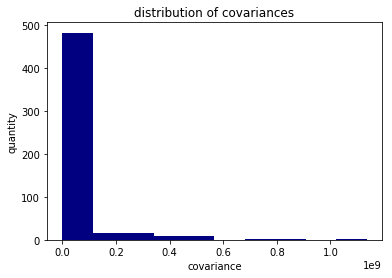

In [18]:
plt.hist(c, histtype="stepfilled", facecolor="navy")
plt.title("distribution of covariances")
plt.ylabel("quantity")
plt.xlabel("covariance")

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)

[9.98777489e-01 1.21951704e-03 2.98094998e-06 1.29543976e-08
 1.36402514e-32 1.21128799e-41 3.51286646e-68 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


>1. Explain what the matrix you get when you call `pca.components_` means.
2. Explain what the vector you get when you call `pca.explained_variance_ratio_` means. What insights about our data can we extract from this?
3. Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.
3. Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?

1. The components matrix contains the set of all eigenvectors used in the principal component analysis. 
2. Explained_variance_ratio_ returns a vector of the variance explained by each direction. I think. This vector reflects the distribution in the histogram above, as the values suffer a steady dropoff as they progress in index.
3:

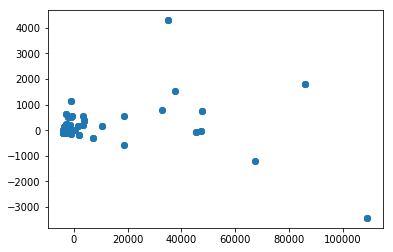

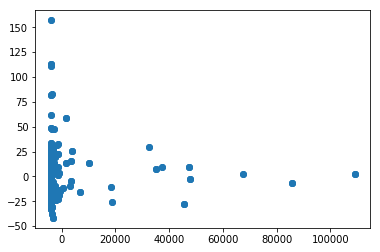

In [34]:
#USing WILDCARD for 2.2.5.3 and 2.2.5.4. These  are half-hearted attempts
X_pca = pca.transform(X)
plt.scatter(X_pca[:,0], X_pca[:, 1])
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 2])
plt.show()

>**Ex. 2.3.4**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).

In [24]:
import scipy.stats as stat
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_tmp =7

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_tmp
y = np.arange(0, 20) + np.random.normal(size=20) * noise_tmp
corr = stat.pearsonr(x,y)
print(corr)

(0.4063186052376271, 0.07544981254922296)


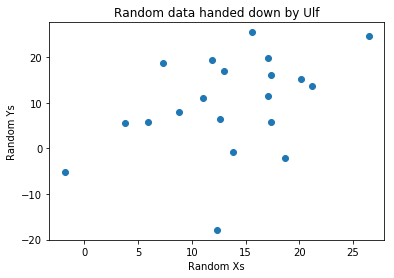

In [33]:
# Why not make a scatter plot here, to see what you're working with?
    
plt.scatter(x,y)
plt.title("Random data handed down by Ulf")
plt.ylabel("Random Ys")
plt.xlabel("Random Xs")
plt.show()

>4. Plot the p-value as a function of `noise_level` (let `noise_level` vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) at which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

In [26]:
import scipy.stats as stat
ps = []
noise = []
noise_level = 1;
while(noise_level <  50):
    noise.append(noise_level)
    a = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    b = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    corr = stat.pearsonr(a,b)
    ps.append(corr[1])
    noise_level +=1


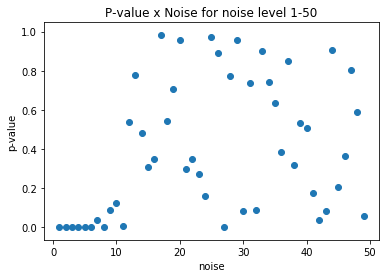

In [31]:
plt.scatter(noise,ps)
plt.xlabel("noise")
plt.ylabel("p-value")
plt.title("P-value x Noise for noise levels 1-50")
plt.show()


4. At noise_level 7, the correlation becomes insignificant. The curve does not saturate at any particular p-value. I'm not sure I understand your use of "the curve saturates at". But due to the randomness of the data, p-values close to .05 (and below) are still generated sometimes, even with high noise level.

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?

>There are 896 super heroes, there are 1147 supervillains

2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

> There are 161 character that are both heroes and villains. The jaccard similarity is about 8.56

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

In [36]:
#get all villans and super heros
import re
hero_ids = []

import requests as rq
import json
hero_names = []
size_heroes = []
#data = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&titles=Marvel%20Comics&prop=revisions&rvprop=content").json()
k = ""
size_h = 0
new = 500
start  = 0
while(new == 500):
    qstring = "https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes&cmlimit=500&cmcontinue="
    qstring = qstring + k
    heroes = rq.get(qstring).json()
    #print(json.dumps(heroes, indent = 4))
    new = len(heroes['query']['categorymembers'])
    size_h = size_h + new
    for i in range(start,size_h):
        markup = ""
        pageid = heroes['query']['categorymembers'][i-start]['pageid']
        title = heroes['query']['categorymembers'][i-start]['title']
        hero_ids.append(pageid) 
        markup = markup + "https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&pageids=" + str(pageid)
        data = rq.get(markup).json()
        data = str(data)
        length_hero = len(data)
        size_heroes.append(length_hero)
        name = title+ ".txt"
        hero_names.append(name)
        f= open('/Users/clairemarie/Desktop/analysis/heroes/'+name,"w+")
        f.write(data)
        f.close
    start = start + new

    if(new < 500):
        break
    else:
        k = heroes['continue']['cmcontinue']
print("total heroes: ", size_h)
    

    
    
    
    
    #   print(json.dumps(heroes, indent = 4))
#villains = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains&cmlimit=500").json()
#print(json.dumps(villains, indent = 4))




FileNotFoundError: [Errno 2] No such file or directory: '/Users/nathanshirley/Desktop/analysis/heroes/Abigail Brand.txt'

In [ ]:
import requests as rq
import json
vill_names = []
ambig_names = []
vill_ids = []
ambig_ids = []
size_vill = []
size_ambig = []
ambig = 0
k = ""
size_h = 0
new = 500
start  = 0
while(new == 500):
  
    qstring = "https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains&cmlimit=500&cmcontinue="
    qstring = qstring + k
    vill = rq.get(qstring).json()
    new = len(vill['query']['categorymembers'])
    size_h = size_h + new
    for i in range(start,size_h):
        markup = ""
        pageid = vill['query']['categorymembers'][i-start]['pageid']
        title = vill['query']['categorymembers'][i-start]['title']
        markup = markup + "https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&pageids=" + str(pageid)
        data = rq.get(markup).json()
        data = str(data)
        length_vill  = len(data)
        size_vill.append(length_vill)
        vill_ids.append(pageid)
        name = title + ".txt"
        if(name == 'Señor Muerte / Señor Suerte.txt'):
            name = "Señor Muerte.txt"
        vill_names.append(name)
        if(name in hero_names):
            ambig_ids.append(pageid)
            size_ambig.append(length_vill)
            ambig = ambig + 1
            ambig_names.append(name)
            f= open('/Users/clairemarie/Desktop/analysis/ambig/'+name,"w+")
            f.write(data)
            f.close
        f= open('/Users/clairemarie/Desktop/analysis/villains/'+name,"w+")
        f.write(data)
        f.close
    start = start + new
   
    
    if(new < 500):
        break
    else:
        k = vill['continue']['cmcontinue']
print("total villains: ", size_h)
    

    

In [ ]:
heroes_num = 896
vill_num = 1146
print("total ambiguous(hero and villain):", ambig)
print("total heroes:", heroes_num)
print("total villains:", vill_num)
print("total only heroes:", (heroes_num - ambig))
print("total only villains:", (vill_num - ambig))
jaccard = (ambig/ (heroes_num + vill_num - ambig))*100
print("jaccard similarity between the two groups:", jaccard)

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

>The largest files for Heroes are almost all larger than the largest files for Villains, further surpproting my previous claim. 

In [ ]:
sorted_heroes = sorted(size_heroes)
sorted_villains = sorted(size_vill)
sorted_ambig = sorted(size_ambig)
h10 = []
v10 = []
a10 = []
lenh = len(sorted_heroes)
lenv = len(sorted_villains)
lena = len(sorted_ambig)
for i in range(0,10):
    h10.append(sorted_heroes[lenh-i-1])
    v10.append(sorted_villains[lenv-i-1])
    a10.append(sorted_ambig[lena-i-1])



plt.hist(a10)
plt.title("Top 10 Ambiguous Sizes")
plt.show()
plt.hist(h10)
plt.title("Top 10 Heroes Sizes")
plt.show()
plt.hist(v10)
plt.title("Top 10 Villains Size")
plt.show()

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?

>*Not all pages have a debut year, and some have multiple. For those that do not have any I insert a 0 at that pages locaiton to represent that no data was present for that file. When plotting however, I take out these 0.s so that the data is more clearly representative of time rather than having two buckets for 0 and the 1990s. For those that have multiple I find the msot recent release date and save that, I culd have also done the earliest. 

* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.


>* We used a histogram to show the numebr of heroes, villains and ambiguous characters over time. From the data is appears that there are a lot more heroes being released than villains in recent years. 

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*

In [ ]:
debut_h = []
for i in range(0,len(hero_ids)):
    markup =  "https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&pageids="+str(hero_ids[i])
    data = rq.get(markup).json()
    string = data['query']['pages'][str(hero_ids[i])]['revisions'][0]['*']
    places = [m.start() for m in re.finditer('debut',string)]
    if(len(places) == 0):
        debut_h.append(0)
    else:
        years = []
        for k in range(0,len(places)):
            find = ''
            for i in range(0,100):
                try:
                    find = find + string[places[k]+i]
                except:
                    find = find
            p = re.search(r'\b\d{4}\b', find)
            try:
                years.append(int(p[0]))
            except:
                years.append(0)
        
        rec = max(years)
        debut_h.append(rec)
    

In [ ]:
debut_v = []
for i in range(0,len(vill_ids)):
    markup =  "https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&pageids="+str(vill_ids[i])
    data = rq.get(markup).json()
    string = data['query']['pages'][str(vill_ids[i])]['revisions'][0]['*']
    places = [m.start() for m in re.finditer('debut',string)]
    if(len(places) == 0):
        debut_h.append(0)
    else:
        years = []
        for k in range(0,len(places)):
            find = ''
            for i in range(0,100):
                try:
                    find = find + string[places[k]+i]
                except:
                    find = find
            p = re.search(r'\b\d{4}\b', find)
            try:
                years.append(int(p[0]))
            except:
                years.append(0)
        
        rec = max(years)
        debut_v.append(rec)
    


In [ ]:
debut_a = []
for i in range(0,len(ambig_ids)):
    markup =  "https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&pageids="+str(ambig_ids[i])
    data = rq.get(markup).json()
    string = data['query']['pages'][str(ambig_ids[i])]['revisions'][0]['*']
    places = [m.start() for m in re.finditer('debut',string)]
    if(len(places) == 0):
        debut_h.append(0)
    else:
        years = []
        for k in range(0,len(places)):
            find = ''
            for i in range(0,100):
                try:
                    find = find + string[places[k]+i]
                except:
                    find = find
            p = re.search(r'\b\d{4}\b', find)
            try:
                years.append(int(p[0]))
            except:
                years.append(0)
        
        rec = max(years)
        debut_a.append(rec)

In [ ]:
non_0_a = []
for i in range (0,len(debut_a)):
    if(debut_a[i] != 0 and debut_a[i] < 2020):
        non_0_a.append(debut_a[i])
non_0_v = []
for i in range (0,len(debut_v)):
    if(debut_v[i] != 0 and debut_v[i] < 2020):
        non_0_v.append(debut_v[i])
non_0_h = []       
for i in range (0,len(debut_h)):
    if(debut_h[i] != 0 and debut_h[i] < 2020):
        non_0_h.append(debut_h[i])

plt.hist(non_0_a)
plt.title("Ambiguous Releases")
plt.show()

plt.hist(non_0_v)
plt.title("Villain Releases")
plt.show()

plt.hist(non_0_h)
plt.title("Hero Releases")
plt.show()